<h1 align = center> <font color = "#66FF99">Evaluation Techniques for Regression Models</font></h1>
<h1 align = center> <font color = "#66FF99"></font></h1>

#### What are Evaluation Techniques ?

Evaluation techniques are essential for assessing the performance of regression models. They help identify the best model and tune hyperparameters to improve prediction accuracy. Here are some common evaluation techniques:

1. Mean Absolute Error (MAE): This metric calculates the average absolute difference between predicted and actual values. It is less sensitive to outliers compared to the Mean Squared Error (MSE).   


2. Mean Squared Error (MSE): This metric calculates the average squared difference between predicted and actual values. It penalizes larger errors more heavily, making it more suitable for situations where outliers are more important.   


3. Root Mean Squared Error (RMSE): This metric calculates the square root of the Mean Squared Error. It is similar to MSE, but it's more interpretable as it's in the same units as the target variable.   


4. Root Mean Squared Log Error (RMSLE): This metric calculates the square root of the Mean Squared Log Error. 


5. R-squared: This metric measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no fit. R-squared can be used to compare different regression models and determine the best-fit model.   


6. Adjusted R-squared: This metric is similar to R-squared, but it accounts for the number of features in the model. It helps to determine the performance of the model in a more controlled environment.   


7. Confidence Intervals: These are used to estimate the uncertainty in the predicted values. They provide a range of values that the true value is likely to fall within.   


8. Cross-Validation: This technique divides the dataset into multiple subsets, trains the model on a subset, and evaluates its performance on the remaining subset. It helps to estimate the model's performance on unseen data and provides a more accurate measure of its performance.   


9. Residual Plots: These plots help to identify any patterns or trends in the residuals (errors) of the model.   

10. Leverage Points: These are data points that have a high leverage on the regression line. They can be influential in determining the model's performance and should be carefully examined.   
 

11. Influential Observations: These are data points that have a substantial impact on the regression model, either by having a large impact on the predicted values or by having a strong influence on the model's parameters. They should be removed from the dataset before training the model.   


These evaluation techniques can help you compare different regression models, tune hyperparameters, and make informed decisions about the performance of your predictive models.



#### Why we require evaluation metrics ? 

Evaluation metrics help us understand the performance of the regression models and make informed decisions about their effectiveness and reliability. They provide a clear understanding of the model's accuracy, reliability, and interpretability. By comparing different evaluation metrics, we can identify the best-performing model and make more informed predictions.   





<h2 align = center> <font color = "#EEAFBB">Importing Necessary Libraries</font></h2>


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


<h2 align = center> <font color = "#16AFBB">Importing Dataset</font></h2>


In [101]:
data = pd.read_csv('Salary.csv')


<h3 align = center> <font color = "cream">Exploring Data</font></h3>


In [102]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [103]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [104]:
data.isnull().sum()
data.dropna(inplace=True,axis=0)
data.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

<h2 align = center> <font color = "#BBAEEB">Preprocessing</font></h2>


In [112]:
data['Education Level'].unique()

array([1, 2, 3, 0])

There are many same degrees with different name, So here i am handling them

In [106]:
data['Education Level'] = data['Education Level'].replace({"Bachelor's Degree":"Bachelor's" , "Master's Degree":"Master's" , 'PhD' :'phD'})

In [107]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'phD', 'High School'], dtype=object)

We handled the same degrees with different names

<h3 align = center> <font color = "#BFFFBB">Encoding the Categorical Data</font></h3>


In [108]:
data['Education Level'] = data['Education Level'].replace({'High School':0,"Bachelor's":1 , "Master's":2 ,'phD' : 3 })
data = pd.get_dummies(data,columns=['Gender'])


C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_14236\2707144198.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education Level'] = data['Education Level'].replace({'High School':0,"Bachelor's":1 , "Master's":2 ,'phD' : 3 })


<h2 align = center> <font color = "#16AEEB">Training Model</font></h2>


In [110]:
X = data.drop(columns=['Salary',"Age","Job Title"],axis = 1)
y = data['Salary']

X_train ,X_test , y_train ,  y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

yPredicted = model.predict(X_test)
print(yPredicted)

model.score(X_test,y_test)



[128763.19649076  94632.84152315  77443.3459296  ... 120762.15878417
 114342.17917827  79714.55177167]


0.6963831481277618

<h1 align = center> <font color = "#AA00BB">Mean Absolute Error</font></h1>
<h1 align = center> <font color = "#66FF99"></font></h1>


#### What is Mean Absolute Error (MAE) ?

MAE is the average absolute difference between the predicted and actual values. It measures the average difference between the predicted and actual values, regardless of their magnitude. It is less sensitive to outliers compared to the Mean Squared Error (MSE).

\begin{equation}
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_{\text{actual},i} - y_{\text{predicted},i} \right|
\end{equation}


#### Advantages:

- Easy to interpret: It's easy to understand the average difference between predicted and actual values.
- Doesn't require the model to be linear: MAE can be used with any regression model, regardless of the underlying assumptions.
- Provides a measure of the average error: It gives an average measure of the difference between the predicted and actual values, regardless of their magnitude.
- Robust to outliers: MAE is less sensitive to outliers compared to MSE, which can help identify and correct errors more effectively.

#### Disadvantages:

- Doesn't directly provide insights into the direction of the error: MAE doesn't provide any information about whether the error is due to a positive or negative prediction.
- Doesn't provide a measure of the relative error: MAE doesn't provide any information about how much the error is relative to the actual value.



### Implemantation

In [113]:
MAEsumError = 0 


for i in range (len(y_test)):
    MAEsumError += abs(y_test.iloc[i] - yPredicted[i])


MAE =  MAEsumError/len(y_test)

print(MAE)

22940.05446498384



<h2 align = center> <font color = "#6188FA">Validating Using Scikit Learn</font></h2>


In [114]:
print("MAE",mean_absolute_error(y_test,yPredicted))

MAE 22940.054464983823


### Interpretation 

The Mean Absolute Error (MAE) calculated using Scikit Learn and our own implementation is approximately 22940. This means that, on average, the predicted salary is 25054 less than the actual salary. This result is reasonable because we used only few features of given dataset for prediction.


<h1 align = center> <font color = "#AA00BB">Mean Squared Error</font></h1>

#### What is the mean squared error ?

MSE is the average squared difference between the predicted and actual values. It measures the average squared difference between the predicted and actual values, taking into account the square of the differences. It penalizes larger errors more heavily compared to the Mean Absolute Error (MAE).

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_{\text{actual},i} - y_{\text{predicted},i} \right)^2
\end{equation}

#### Advantages :

- It provides a clear indication of the average squared difference between the predicted and actual values.
- It helps to understand the spread of the predicted values compared to the actual values.
- It is less sensitive to outliers compared to the Mean Absolute Error (MAE).

### Disadvantages :

- It can be difficult to interpret, as it involves squaring the differences.
- It does not provide a clear indication of the average difference between the predicted and actual values.





### Implementation

In [115]:
MSEsumError = 0 


for i in range (len(y_test)):
    MSEsumError += (y_test.iloc[i] - yPredicted[i])**2


MSE =  MSEsumError/len(y_test)

print(MSE)

865751080.2885832



<h2 align = center> <font color = "#61BBF3">Validating Using Scikit Learn</font></h2>


In [116]:

print("MSE",mean_squared_error(y_test,yPredicted))


MSE 865751080.2885829


### Interpretation

The Mean Squared Error (MSE) calculated using Scikit Learn and our own implementation is approximately 865751080. This means that, on average, the predicted salary is 982050061 more than the actual salary squared. This result is reasonable because we used only few features of given dataset for prediction.

 



<h1 align = center> <font color = "#AA00BB">Root Mean Squared Error</font></h1>

#### What is the root mean squared error ? 

RMSE is the square root of the Mean Squared Error. It measures the average difference between the predicted and actual values, taking into account the square root of the differences. It is less sensitive to outliers compared to the Mean Absolute Error (MAE) and the Mean Squared Error (MSE).

\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_{\text{actual},i} - y_{\text{predicted},i} \right)^2}
\end{equation}

#### Advantages:
- The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.
- It helps to understand the spread of the predicted values compared to the actual values.
- It is less sensitive to outliers compared to the Mean Absolute Error (MAE) and the Mean Squared Error (MSE).

### Disadvantages:

- It can be difficult to interpret, as it involves taking the square root of the Mean Squared Error.
- It is not that robust to outliers as compared to MAE.




### Implementation


In [122]:
RMSEsumError = 0 


for i in range (len(y_test)):
    RMSEsumError += (y_test.iloc[i] - yPredicted[i])**2


RMSE = np.sqrt(RMSEsumError/len(y_test))

print(RMSE)

29423.648317103423



<h2 align = center> <font color = "#BBAA87">Validating Using Scikit Learn</font></h2>


In [120]:

print("RMSE",root_mean_squared_error(y_test,yPredicted))


RMSE 29423.64831710342


### Interpretation

The Root Mean Squared Error (RMSE) calculated using Scikit Learn and our own implementation is approximately 29423.64. This means that, on average, the predicted salary is 29423.64 more than the actual salary. This result is reasonable because we used only few features of given the dataset for prediction. 

<h1 align = center> <font color = "#AAAA00">Root Mean Squared Log Error</font></h1>

#### What is the root mean squared log error?

RMSLE is the square root of the Mean Squared Logarithmic Error. It measures the average difference between the logarithms of the predicted and actual values, taking into account the square root of the differences. It is less sensitive to outliers compared to the Mean Absolute Error (MAE) and the Mean Squared Error (MSE).

\begin{equation}
\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log\left(y_{\text{predicted},i} + 1\right) - \log\left(y_{\text{actual},i} + 1\right) \right)^2}
\end{equation}




### Implementation





In [129]:
import numpy as np

RMSLEsumError = 0 

for i in range(len(y_test)):
    RMSLEsumError += (np.log(yPredicted[i] + 1) - np.log(y_test.iloc[i] + 1))**2

RMSLE = np.sqrt(RMSLEsumError / len(y_test))

print(RMSLE)


0.3231749322963715



<h2 align = center> <font color = "#BBFF07">Validating Using Scikit Learn</font></h2>


In [125]:
print("RMSLE",root_mean_squared_log_error(y_test,yPredicted))



RMSLE 0.32317493229637156


### Interpretation


A RMSLE of 0.323 suggests that, on average, the logarithmic difference between your predicted and actual values is 0.323 units. This means there’s a moderate level of error in the predictions.





<h1 align = center> <font color = "#AAFF77">R Squared</font></h1>


#### What is R Squared ?

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the dependent variable is perfectly explained by the independent variable(s), and 0 indicates that the independent variable(s) do not contribute to explaining the dependent variable at all.

\begin{equation}
R^2 = 1- \frac{\text{SSR}}{\text{SST}}
\end{equation}










#### Advantages:

- It provides a clear measure of the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
- It can be used to compare the goodness of fit of different regression models.

### Disadvantages:

- It can be difficult to interpret, as it involves comparing the explained variance to the total variance.
- It does not provide a measure of the overall significance of the independent variables.




### Implementation

In [135]:
yMean = np.mean(y)
yMean

SST = np.sum((y_test - yMean)**2)

SSR = np.sum((y_test - yPredicted)**2)

R_squared = 1 - (SSR / SST)

print(R_squared)

0.6964246145371722



<h2 align = center> <font color = "#55FFEE">Validating Using Scikit Learn</font></h2>


In [138]:
print("R^2",r2_score(y_test,yPredicted))

R^2 0.6963831481277618


### Interpretation

The R-squared value calculated using Scikit Learn and our own implementation is approximately 0.696. This means that, on average, the predicted salary explains 69.6% of the variance in the actual salary. This result is reasonable because we used only few features of given the dataset for prediction. 


<h1 align = center> <font color = "#AA0077">Adjusted R Squared</font></h1>

#### What is Adjusted R Squared ?

Adjusted R-squared is a statistical measure that adjusts the R-squared value for the number of independent variables in a regression model to account for the effects of multiple factors. It is calculated as follows:

\begin{equation}
\text{Adjusted R}^2 = 1 - \left({1 - R^2} \right) \times \frac{n - 1}{n - p - 1}
\end{equation}

Where:

- R^2 is the R-squared value

- n is the number of data points

- p is the number of independent variables

- Adjusted R^2 is the adjusted R-squared value

### Advantages:

- It provides a more accurate measure of the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
- It accounts for the effects of multiple factors in the model.

### Disadvantages:

- It can be difficult to interpret, as it involves comparing the adjusted R-squared value to the R-squared value.

- It does not provide a measure of the overall significance of the independent variables.



### Implementation

In [141]:


import numpy as np

n = len(y_test)

p = len(X_test.columns)

R_squared = 1 - (SSR / SST)

Adjusted_R_squared = 1 - (((1 - R_squared)) * (n - 1) / (n - p - 1))

print(Adjusted_R_squared)



0.6952867757610746


<h1 align = center> <font color = "#8899FF">Mean Absolute Percentage Error</font></h1>


#### What is Mean Absolute Percentage Error ?

MAPE is a statistical measure that calculates the average absolute percentage error of the predicted values compared to the actual values. It is calculated as follows:

\begin{equation}
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_{\text{actual},i} - y_{\text{predicted},i}}{y_{\text{actual},i}} \right| \times 100\%
\end{equation}

### Advantages:

- It provides a clear measure of the average percentage error of the predicted values compared to the actual values.
- It can be used to compare the performance of different regression models.

### Disadvantages:

- It can be difficult to interpret, as it involves calculating the absolute percentage error and then dividing it by the actual value.
- It does not account for the direction of the error.

### Implementation

In [145]:

MAPEsumError = 0 

for i in range(len(y_test)):
    MAPEsumError += abs((y_test.iloc[i] - yPredicted[i]) / y_test.iloc[i])


MAPE = (MAPEsumError / len(y_test))*100

print(MAPE)



33.943549835750005


In [147]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, yPredicted)

np.float64(0.3394354983574998)

### Interpretation

The Mean Absolute Percentage Error (MAPE) calculated using Scikit Learn and our own implementation is approximately 33.94%. This means that, on average, the predicted salary is 33.94% more than the actual salary. This result is reasonable because we used only few features of given the dataset for prediction. 


<h1 align = center> <font color = "#AAA9FB">Residual Plots</font></h1>


#### What is residual plots?

Residual plots are graphical tools used to assess the quality of a regression model. They help to identify any patterns or outliers in the residuals, which can indicate potential issues with the model's assumptions.



### Implementation

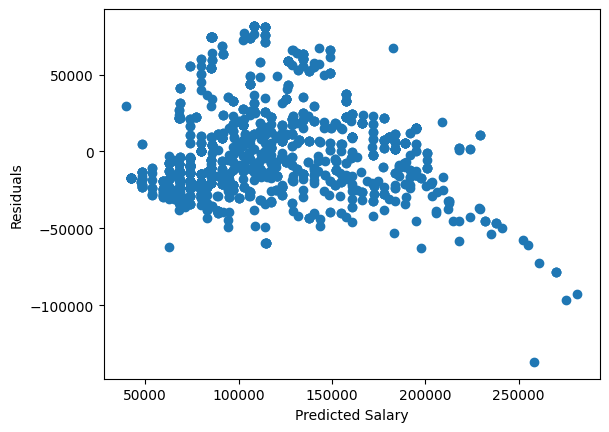

In [150]:

residuals = y_test - yPredicted

plt.scatter(yPredicted, residuals)

plt.xlabel("Predicted Salary")

plt.ylabel("Residuals")

plt.show()





### Interpretation 

The residual plot shows a scatter plot of the predicted salary (on the x-axis) versus the residuals (on the y-axis). If the model is a good fit, the residuals should be randomly scattered around the horizontal line at zero. However, if there are any patterns or outliers, they may indicate that the model's assumptions are not met. In this case, it seems that there may be some heteroscedasticity in the residuals, meaning that the variance of the residuals may not be constant across the range of predicted salaries. This could potentially affect the accuracy of the model's predictions.
